In [1]:
#Numpy, Pandas, Seaborn, Matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import collections
import matplotlib.pyplot as plt
%matplotlib inline

#import sklearn libraries
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score,recall_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#import tensorflow keras library
from tensorflow import keras
from keras import Sequential
from keras.layers.core import Dense
from keras.utils import plot_model

#Clusterin & Text processing libraries
from scipy.cluster import hierarchy
from sklearn import cluster
import sklearn.feature_extraction.text as sk_text

Using TensorFlow backend.


In [2]:
df = pd.read_excel("Admiss.xlsx")
df.head(3)

,Serial no,GRE score,TOEFL,University,SOP,LOR,CGPA,Research,Admission
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [3]:
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

In [4]:
#Pre-processing
df.drop('Serial no', axis = 1, inplace = True)
df.head(3)

,GRE score,TOEFL,University,SOP,LOR,CGPA,Research,Admission
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72


In [5]:
#Normalizing
for col in df.columns:
    normalize_numeric_minmax(df, col)
df.head(3)    

,GRE score,TOEFL,University,SOP,LOR,CGPA,Research,Admission
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175


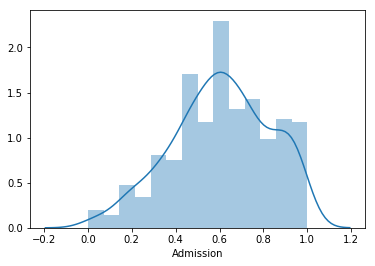

In [6]:
sns.distplot(df['Admission'])

In [7]:
df['Admitted'] = [1 if x>0.7 else 0 for x in df['Admission']]
df.drop('Admission', axis = 1, inplace = True)
df.head(3)

,GRE score,TOEFL,University,SOP,LOR,CGPA,Research,Admitted
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,1
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0


In [8]:
feature_cols = [];
i = 0;
for col in df.columns:
    if (col!='Admitted'):
        feature_cols.insert(i, col)
        i+=1

In [9]:
feature_cols

['GRE score', 'TOEFL', 'University', 'SOP', 'LOR', 'CGPA', 'Research']

In [10]:
x = df[feature_cols] # Features
y = df['Admitted'] # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [11]:
x_train.shape

(350, 7)

In [12]:
#print(x)
print(y)

0      1
1      0
2      0
3      1
4      0
      ..
495    1
496    1
497    1
498    0
499    1
Name: Admitted, Length: 500, dtype: int64


In [13]:
# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)


In [14]:
X,Y = to_xy(df,'Admitted')
#testX, testY = to_xy(testData,'Admitted')

C:\Users\ALEX\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if __name__ == '__main__':


In [15]:
Y.shape

(500, 2)

In [16]:
X.shape

(500, 7)

In [17]:
x_test.shape

(150, 7)

In [18]:
y_test.shape

(150,)

In [19]:
x_train.shape

(350, 7)

In [20]:
y_train.shape

(350,)

In [21]:
model = Sequential()
model.add(Dense(7, input_dim = X.shape[1], activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam')
model.fit(X,Y,verbose=2, epochs=100)

Epoch 1/100
 - 0s - loss: 0.6831
Epoch 2/100
 - 0s - loss: 0.6489
Epoch 3/100
 - 0s - loss: 0.6164
Epoch 4/100
 - 0s - loss: 0.5842
Epoch 5/100
 - 0s - loss: 0.5480
Epoch 6/100
 - 0s - loss: 0.5115
Epoch 7/100
 - 0s - loss: 0.4763
Epoch 8/100
 - 0s - loss: 0.4440
Epoch 9/100
 - 0s - loss: 0.4161
Epoch 10/100
 - 0s - loss: 0.3938
Epoch 11/100
 - 0s - loss: 0.3763
Epoch 12/100
 - 0s - loss: 0.3599
Epoch 13/100
 - 0s - loss: 0.3475
Epoch 14/100
 - 0s - loss: 0.3359
Epoch 15/100
 - 0s - loss: 0.3291
Epoch 16/100
 - 0s - loss: 0.3208
Epoch 17/100
 - 0s - loss: 0.3175
Epoch 18/100
 - 0s - loss: 0.3104
Epoch 19/100
 - 0s - loss: 0.3056
Epoch 20/100
 - 0s - loss: 0.3003
Epoch 21/100
 - 0s - loss: 0.2967
Epoch 22/100
 - 0s - loss: 0.2968
Epoch 23/100
 - 0s - loss: 0.2919
Epoch 24/100
 - 0s - loss: 0.2866
Epoch 25/100
 - 0s - loss: 0.2861
Epoch 26/100
 - 0s - loss: 0.2829
Epoch 27/100
 - 0s - loss: 0.2801
Epoch 28/100
 - 0s - loss: 0.2765
Epoch 29/100
 - 0s - loss: 0.2764
Epoch 30/100
 - 0s - lo

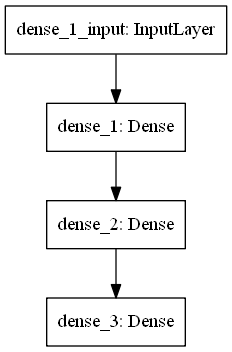

In [22]:
#model visualization
plot_model(model, to_file='model.png')

In [23]:
x_test

,GRE score,TOEFL,University,SOP,LOR,CGPA,Research
304,0.46,0.500000,0.25,0.375,0.250,0.522436,0.0
340,0.44,0.535714,0.50,0.500,0.500,0.532051,1.0
47,0.98,0.964286,1.00,0.875,0.750,0.929487,0.0
67,0.52,0.535714,0.25,0.625,0.625,0.589744,1.0
479,0.70,0.642857,0.75,0.875,0.750,0.692308,1.0
...,...,...,...,...,...,...,...
331,0.42,0.464286,0.25,0.500,0.250,0.423077,1.0
197,0.40,0.500000,0.25,0.625,0.375,0.490385,0.0
95,0.28,0.285714,0.75,0.125,0.375,0.333333,0.0
122,0.40,0.500000,0.75,0.125,0.375,0.500000,0.0


In [24]:
#x_train, x_test, y_train, y_test
pred = model.predict(x_test)
print(pred[0])

[0.9565112  0.04348877]


In [25]:
pred = np.argmax(pred, axis=1)

In [26]:
true = np.argmax(y_test, axis=1)

C:\Users\ALEX\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


In [27]:
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

In [28]:
df['Class'] = df['Admitted'].replace(['0'],'not-admitted')
Classes = encode_text_index(df,'Class')

In [29]:
Classes[pred]

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [30]:
Classes[y_test]

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [31]:
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, pred)))
print(classification_report(y_test,pred))

Accuracy on test data is 0.93
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       102
           1       0.91      0.88      0.89        48

    accuracy                           0.93       150
   macro avg       0.93      0.92      0.92       150
weighted avg       0.93      0.93      0.93       150



## Text Mining

In [32]:
corpus = [ 'Now for manners use has company believe parlors.',
'Least nor party who wrote while did. Excuse formed as is agreed admire so on result parish.',
'Put use set uncommonly announcing and travelling. Allowance sweetness direction to as necessary.',
'Principle oh explained excellent do my suspected conveying in.',
'Excellent you did therefore perfectly supposing described. ',
'Its had resolving otherwise she contented therefore.',
'Afford relied warmth out sir hearts sister use garden.',
'Men day warmth formed admire former simple.',
'Humanity declared vicinity continue supplied no an. He hastened am no property exercise of. ' ,
'Dissimilar comparison no terminated devonshire no literature on. Say most yet head room such just easy. ']

In [33]:
vectorizer = sk_text.CountVectorizer(min_df=1)
#vectorizer = sk_text.CountVectorizer(stop_words = 'english')

#min_df: ignore terms that have a document frequency < min_df.

matrix = vectorizer.fit_transform(corpus)

print(type(matrix))          # Compressed Sparse Row matrix
print(matrix.toarray())        #  convert it to numpy array

print(vectorizer.get_feature_names())

<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 

## TfIdfVectorizer

In [34]:
vectorizer = sk_text.TfidfVectorizer(
                             #stop_words='english',
                             #max_features = 1000,
                             min_df=1)


#max_features:  build a vocabulary that only consider the top max_features features ordered by term frequency across the corpus.

matrix = vectorizer.fit_transform(corpus)

print(type(matrix))          # Compressed Sparse Row matrix
print(matrix.toarray())        #  convert it to numpy array

print(vectorizer.get_feature_names())

<class 'scipy.sparse.csr.csr_matrix'>
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.36386176 0.36386176 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.36386176 0.
  0.         0.         0.         0.36386176 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.36386176 0.         0.
  0.         0.         0.         0.         0.36386176 0.
  0.         0.         0.         0.         0.         0.36386176
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.27061472 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.215

In [35]:
vectorizer = sk_text.TfidfVectorizer(#stop_words='english',
                             #max_features = 1000,
                             min_df=2, 
                             #max_df=5
                             )

#min_df: ignore terms that have a document frequency < min_df.
#max_df: ignore terms that have a document frequency > max_df


matrix = vectorizer.fit_transform(corpus)
print(type(matrix))               # Compressed Sparse Row matrix

tfidf_data = matrix.toarray()     #  convert it to numpy array

print(tfidf_data)
print(vectorizer.get_feature_names())

<class 'scipy.sparse.csr.csr_matrix'>
[[0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.        ]
 [0.4472136  0.4472136  0.4472136  0.         0.4472136  0.
  0.4472136  0.         0.         0.        ]
 [0.         0.75262077 0.         0.         0.         0.
  0.         0.         0.65845424 0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.57735027 0.57735027 0.         0.
  0.         0.57735027 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.65845424 0.75262077]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.         0.         0.         0.57735027]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.        ]

## Clustering

In [36]:
text = pd.read_csv('imdb_dataset.csv')

In [37]:
textCluster=text[['title', 'imdb_rating']]

In [38]:
data = textCluster.drop('title',axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=300, random_state=1)
k_means.fit(data) 
labels = k_means.labels_
pd.DataFrame(labels, index=textCluster.title, columns=['Cluster ID'])

,Cluster ID
title,
Filly Brown,1
The Dish,0
Waiting for Guffman,0
The Age of Innocence,0
Malevolence,1
...,...
Death Defying Acts,1
Half Baked,0
Dance of the Dead,1


In [39]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

,imdb_rating
0,7.190464
1,5.464259


## Plot SSE

Text(0, 0.5, 'SSE')

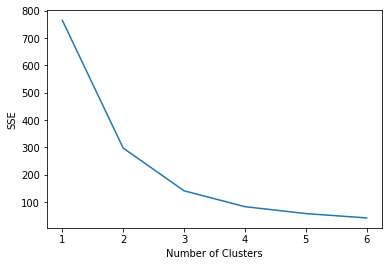

In [40]:
numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

## Hierarchical Clustering

### Single Link

In [41]:
data = text[['genre', 'studio','imdb_rating']]

### Single Link (MIN)

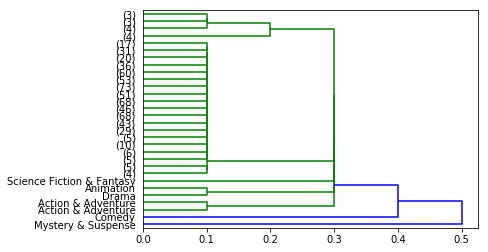

In [42]:
names = data['genre']
Y = data['studio']
X = data.drop(['genre','studio'],axis=1)
Z = hierarchy.linkage(X.values, 'single')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right', truncate_mode="lastp")

### Complete Link (MAX)

In [43]:
genres = data['genre']

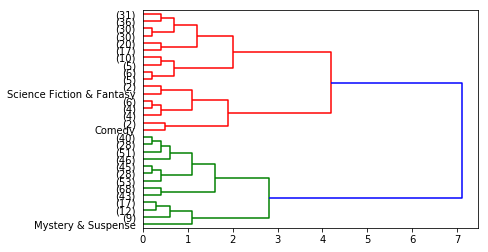

In [44]:
Z = hierarchy.linkage(X.values, 'complete')
dn = hierarchy.dendrogram(Z, labels=genres.tolist(), orientation='right', truncate_mode="lastp")

### Group Average

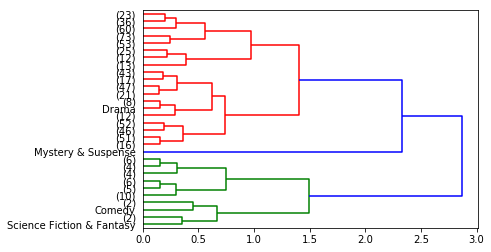

In [45]:
Z = hierarchy.linkage(X.values, 'average')
dn=hierarchy.dendrogram(Z, labels=genres.tolist(), orientation='right', truncate_mode="lastp")